In [157]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, Ridge

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
SEED = 42

In [1]:
!wget  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-24 16:49:39--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M   489KB/s    in 2,8s    

2022-09-24 16:49:43 (489 KB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
df = pd.read_csv('housing.csv')

In [8]:
target = 'median_house_value'
feats =['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'ocean_proximity']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [52]:
cat_feats = set(df.dtypes[df.dtypes == 'object'].index)
num_feats = set(df.dtypes[df.dtypes != 'object'].index)
cat_feats, num_feats

({'ocean_proximity'},
 {'bedrooms_per_room',
  'households',
  'housing_median_age',
  'latitude',
  'longitude',
  'median_house_value',
  'median_income',
  'population',
  'population_per_household',
  'rooms_per_household',
  'total_bedrooms',
  'total_rooms'})

In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df.fillna(0,inplace=True)

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
df['rooms_per_household'] = df.total_rooms / df.households

In [15]:
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms

In [16]:
df['population_per_household'] = df.population / df.households

In [19]:
# Q1

df.ocean_proximity.value_counts().index[0]

'<1H OCEAN'

In [27]:
df_train_val, df_test = train_test_split(df, test_size=.2, random_state=SEED)
df_train_val.shape, df_test.shape

((16512, 13), (4128, 13))

In [34]:
df_train, df_val = train_test_split(
    df_train_val, 
    test_size=df_test.shape[0] / df_train_val.shape[0], 
    random_state=SEED
)
df_train.shape, df_val.shape

((12384, 13), (4128, 13))

In [35]:
y_train = df_train[target]
y_val = df_val[target]
y_test = df_test[target]

In [36]:
del df_train[target]
del df_val[target]
del df_test[target]

/tmp/ipykernel_323119/867259721.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.heatmap(df_train_val[num_feats].corr(), annot=True);


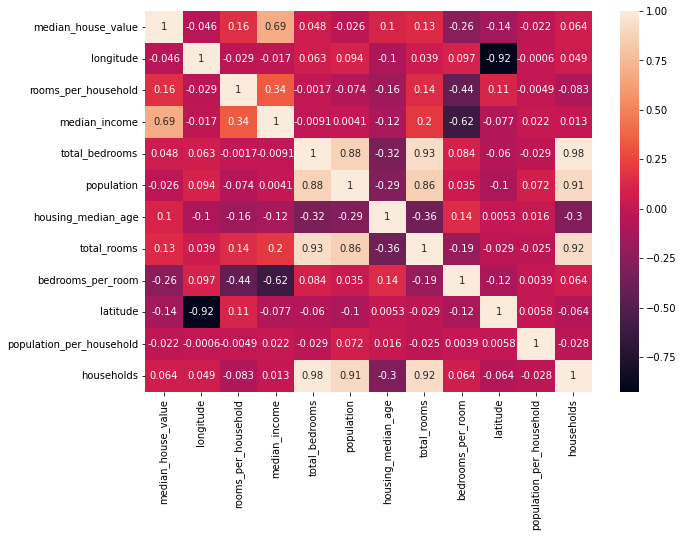

In [63]:
plt.subplots(figsize=(10,7))
sns.heatmap(df_train_val[num_feats].corr(), annot=True);

In [68]:
# Q2   total_bedrooms - households

df_train_val[num_feats].corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

/tmp/ipykernel_323119/88597198.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train_val[num_feats].corr().abs().unstack().sort_values(ascending=False).drop_duplicates()


median_house_value        median_house_value          1.000000
total_bedrooms            households                  0.980255
                          total_rooms                 0.930489
longitude                 latitude                    0.924485
households                total_rooms                 0.920482
                                                        ...   
population_per_household  rooms_per_household         0.004922
population                median_income               0.004122
population_per_household  bedrooms_per_room           0.003938
total_bedrooms            rooms_per_household         0.001659
longitude                 population_per_household    0.000598
Length: 67, dtype: float64

In [71]:
target_threshold = df_train_val[target].mean()
target_threshold

207194.6937378876

In [75]:
y_train_bin = (y_train > target_threshold).astype(int)
y_val_bin = (y_val > target_threshold).astype(int)
y_test_bin = (y_test > target_threshold).astype(int)
y_train_bin.mean(), y_val_bin.mean(), y_test_bin.mean()

(0.4064922480620155, 0.40794573643410853, 0.3999515503875969)

In [78]:
df_train[cat_feats], y_train_bin

/tmp/ipykernel_323119/2180721668.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train[cat_feats], y_train_bin


(      ocean_proximity
 17244       <1H OCEAN
 8817       NEAR OCEAN
 19686          INLAND
 3545        <1H OCEAN
 17019      NEAR OCEAN
 ...               ...
 5606        <1H OCEAN
 16339          INLAND
 14965       <1H OCEAN
 11117       <1H OCEAN
 8472        <1H OCEAN
 
 [12384 rows x 1 columns],
 17244    1
 8817     1
 19686    0
 3545     1
 17019    1
         ..
 5606     0
 16339    0
 14965    1
 11117    0
 8472     0
 Name: median_house_value, Length: 12384, dtype: int64)

In [80]:
def calculate_mi(series):
    return mutual_info_score(series, y_train_bin)


In [85]:
# Q3

round(df_train[cat_feats].apply(calculate_mi), 2)

/tmp/ipykernel_323119/3814806677.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  round(df_train[cat_feats].apply(calculate_mi), 2)


ocean_proximity    0.1
dtype: float64

In [99]:
df_train = pd.concat(
    [df_train, pd.get_dummies(df_train[cat_feats])], 
    join='inner', 
    axis=1
)

/tmp/ipykernel_323119/22586861.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  [df_train, pd.get_dummies(df_train[cat_feats])],


In [100]:
df_val = pd.concat(
    [df_val, pd.get_dummies(df_val[cat_feats])], 
    join='inner', 
    axis=1
)

/tmp/ipykernel_323119/1790756747.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  [df_val, pd.get_dummies(df_val[cat_feats])],


In [101]:
df_test = pd.concat(
    [df_test, pd.get_dummies(df_test[cat_feats])], 
    join='inner', 
    axis=1
)

/tmp/ipykernel_323119/1427578019.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  [df_test, pd.get_dummies(df_test[cat_feats])],


In [105]:
cat_feats

{'ocean_proximity'}

In [106]:
del df_train['ocean_proximity']
del df_val['ocean_proximity']
del df_test['ocean_proximity']

In [143]:
model = LogisticRegression(
    solver="liblinear", C=1.0, max_iter=1000, random_state=SEED
)

In [144]:
model.fit(df_train, y_train_bin)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [145]:
# Q4

main_acc = accuracy_score(model.predict(df_val), y_val_bin)
print(main_acc)
main_acc = round(main_acc, 2)

0.8352713178294574


In [150]:
diffs = dict()
for feat in df_train.columns:
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=SEED)
    model.fit(df_train[df_train.columns[~df_train.columns.isin([feat])]], y_train_bin)
    preds = model.predict(df_val[df_train.columns[~df_train.columns.isin([feat])]])
    diffs[feat] = abs(main_acc - accuracy_score(preds, y_val_bin))

In [151]:
# Q5

sorted(diffs.items(), key=lambda x: x[1])

[('total_rooms', 0.002306201550387521),
 ('ocean_proximity_NEAR BAY', 0.0027906976744185297),
 ('total_bedrooms', 0.0032751937984495383),
 ('bedrooms_per_room', 0.004001937984496107),
 ('ocean_proximity_INLAND', 0.004001937984496107),
 ('ocean_proximity_ISLAND', 0.004001937984496107),
 ('population_per_household', 0.0042441860465115555),
 ('ocean_proximity_NEAR OCEAN', 0.0042441860465115555),
 ('rooms_per_household', 0.004486434108527115),
 ('ocean_proximity_<1H OCEAN', 0.005213178294573573),
 ('households', 0.006666666666666599),
 ('latitude', 0.007393410852713167),
 ('longitude', 0.008362403100775184),
 ('housing_median_age', 0.008604651162790633),
 ('population', 0.010300387596899219),
 ('median_income', 0.053662790697674434)]

In [155]:
y_train_log1p = np.log1p(y_train)
y_val_log1p = np.log1p(y_val)
y_test_log1p = np.log1p(y_test)

In [171]:
diffs_reg = dict()
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=SEED)
    model.fit(df_train, y_train_log1p)
    preds = model.predict(df_val)
    diffs_reg[a] = round(mean_squared_error(preds, y_val_log1p, squared=False), 10)

In [172]:
# Q6

sorted(diffs_reg.items(), key=lambda x: x[1])

[(0, 0.5240635707),
 (0.01, 0.5240635707),
 (0.1, 0.5240635709),
 (1, 0.5240635725),
 (10, 0.5240635888)]